In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
#import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

#data1 = pd.read_csv('NiproData_01052019 to 09052019.csv', parse_dates=['LastUpdateTimeStamp'],date_parser=dateparse)
#data2 = pd.read_csv('Nipro10052019 to 19052019.csv', parse_dates=['LastUpdateTimeStamp'],date_parser=dateparse)
#data3 = pd.read_csv('Nipro Date 20052019 to 28052019.csv', parse_dates=['LastUpdateTimeStamp'],date_parser=dateparse)

In [2]:
data1 = pd.read_csv('NiproData_01052019 to 09052019.csv')
data2 = pd.read_csv('Nipro10052019 to 19052019.csv') 
data3 = pd.read_csv('Nipro Date 20052019 to 28052019.csv')

In [3]:
print(data1.shape,data2.shape,data3.shape)

(78786, 50) (188405, 50) (152266, 50)


In [4]:
data = data1.append(data2)

In [5]:
data = data.append(data3)

In [6]:
data.shape

(419457, 50)

In [7]:
data = data.sort_values(by=['LastUpdateTimeStamp'])
data.drop_duplicates(inplace=True)

In [8]:
#data.shape

In [9]:
data["dates"]=data["LastUpdateTimeStamp"].dt.date
data.head()


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
new_dict={}
number_1=[]
len_grp=[]
dates=[]
#print(data.groupby('PatientNumber').PatientNumber.nunique())
#print((data.groupby('PatientNumber')) )

#print(data['PatientNumber'].unique())
#print(data.columns)
#print(len(data['Dates']))
data['PatientNumber'] = data['PatientNumber'].astype('str')
data['dates'] = data['dates'].astype('str')


#print(data['PatientNumber'].unique())


for aa, group in data.groupby(["PatientNumber","Dates"]):
    if len(group)>=2500:
        print(aa[0], aa[1], len(group))
    
    #for number, group in data.groupby('Dates'):
        #print(number, len(group),len(group.Dates.unique()))
        number_1.append(aa[0])
        len_grp.append(len(group))
        dates.append(aa[1]) 
len(number_1)

In [ ]:
for (p_no, date), group in data.groupby(["PatientNumber","Dates"]):
    if len(group)>=2500:
#         print(aa[0], aa[1], len(group))
        
        group.set_index('LastUpdateTimeStamp', inplace=True)
        ax = group.loc[:,['TBVol']].plot()
        ax.set_ylabel(p_no)
        ax.set_xlabel(date)

In [ ]:
for (p_no, date), group in data.groupby(["PatientNumber","Dates"]):
    if len(group)>=2500:
        #print(aa[0], aa[1], len(group))
        #patientid = p_no
         date = date
         #group.set_index('LastUpdateTimeStamp', inplace=True)
         ax = group.loc[:,['BPSyst']].plot()
         ax.set_ylabel(p_no)
         ax.set_xlabel(date)

In [ ]:
to_drop=['ID','DialysisScheduleId', 'FirstName', 'MiddleName',
       'LastName', 'BillNo', 'DialysisDataId', 'Status',
       'TreatmentType', 'Bypass', 'Dflow','BpFlow','WBCond','DIPPG2','DIPPG4','SNPress', 'RTime', 'PTime', 'TrTime', 'EstFTime',
        'THour',"AUFSpeed",'PUFRem','SPSpeed',
       'TUFSpeed', 'TUfGoal', 'TTime', 'BFAvg','TotCond',
       'AlarmCode', 'AlarmType', 'AddedDate', 'SerialNumber',
       'NiproMachineName']
data1=data.drop(to_drop,axis=1)

In [ ]:
data1.shape

In [ ]:
to_drop = []
for i, row in data1.iterrows():
    if row['PatientNumber'] == '28991' and row['dates']=='2019-05-23' : to_drop.append(i) 
#    if row['PatientNumber'] == '11956' and row['Dates']=='10-05-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '16897' and row['Dates']=='30-04-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '23857' and row['Dates']=='03-05-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '26710' and row['Dates']=='13-05-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '28382' and row['Dates']=='13-05-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '28991' and row['Dates']=='02-05-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '28991' and row['dates']=='2019-05-23' : to_drop.append(i)
#     elif row['PatientNumber'] == '30783' and row['Dates']=='01-05-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '30783' and row['Dates']=='13-05-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '32922' and row['Dates']=='13-05-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '32922' and row['Dates']=='30-04-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '37425' and row['Dates']=='13-05-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '38687' and row['Dates']=='13-05-19' : to_drop.append(i)
#     elif row['PatientNumber'] == '39708' and row['Dates']=='10-05-19' : to_drop.append(i)
data1.drop(index=to_drop, inplace=True)

In [ ]:
tuples_to_drop = [("11956", "10-05-19"), ("16897", "30-04-19"), ('23857', "03-05-19"), ("26710", "13-05-19"), ("28382", "13-05-19"), ("28991", "02-05-19"), ("28991", "23-05-19"), ("30783", "01-05-19"), ("30783", "13-05-19"), ("39708", "10-05-19"), ("32922", "13-05-19"), ("32922", "30-04-19"), ("37425", "13-05-19"), ("38687", "13-05-19")]

In [ ]:
new_dict={}
number_1=[]
len_grp=[]
dates=[]
groups = []
#print(data.groupby('PatientNumber').PatientNumber.nunique())
#print((data.groupby('PatientNumber')) )

#print(data['PatientNumber'].unique())
#print(data.columns)
#print(len(data['Dates']))
data1['PatientNumber'] = data1['PatientNumber'].astype('str')
data1['dates'] = data1['dates'].astype('str')


#print(data['PatientNumber'].unique())


for (p_no,date), group in data1.groupby(["PatientNumber","Dates"]):
    if len(group)>=2500:
        if (p_no,date) in tuples_to_drop:
            continue
        else:
            print(p_no, date, len(group))
        #for number, group in data.groupby('Dates'):
        #print(number, len(group),len(group.Dates.unique()))
            number_1.append(p_no)
            len_grp.append(len(group))
            dates.append(date)
            groups.append(group)
len(number_1)

In [10]:
data2 = pd.concat(groups, axis=0)
data2.to_csv("groupeddata.csv", index=False)

NameError: name 'groups' is not defined

In [11]:
#data2

In [12]:
# for aa, group in data2.groupby(["PatientNumber","Dates"]):
#     if len(group)>=2500:
#         #print(aa[0], aa[1], len(group))
#         patientid = aa[0]
#         date = aa[1]
#         group.set_index('LastUpdateTimeStamp', inplace=True)
#         ax = group.loc[:,['TBVol']].plot()
#         ax.set_ylabel(patientid)
#         ax.set_xlabel(date)

In [13]:
#data2


In [23]:
number_2=[]
Group=[]
for aa, group in data2.groupby(["PatientNumber","Dates"]):
    if len(group)>=2500:
        group['BPSyst'].iloc[0:2500]
        #print(aa[0], aa[1], len(group))
        Group.append([aa[0], aa[1], len(group)])
    #for number, group in data.groupby('Dates'):
        #print(number, len(group),len(group.Dates.unique()))
        number_2.append(aa[0])
        len_grp.append(len(group))
        dates.append(aa[1]) 
#len(number_2)

In [24]:
#Group
G=pd.DataFrame(Group)
type(G)

pandas.core.frame.DataFrame

In [25]:
number_2=[]
count=0
NewData=np.zeros((82,2500))
for aa, group in data2.groupby(["PatientNumber","Dates"]):
    if len(group)>=2500:
        group.set_index('LastUpdateTimeStamp', inplace=True)
        NewData[count]= np.array(group['BPSyst'].iloc[0:2500])
        #print(aa[0], aa[1], len(group))
        count+=1
    #for number, group in data.groupby('Dates'):
        #print(number, len(group),len(group.Dates.unique()))
        number_2.append(aa[0])
        len_grp.append(len(group))
        dates.append(aa[1]) 
len(number_2)


82

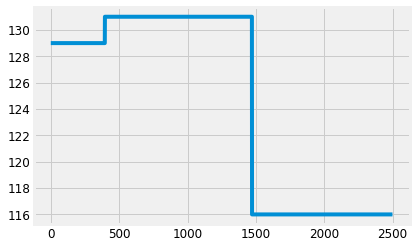

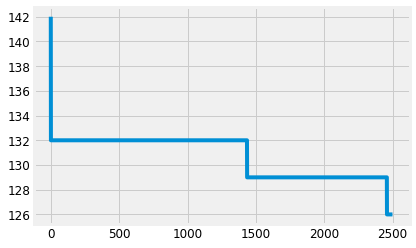

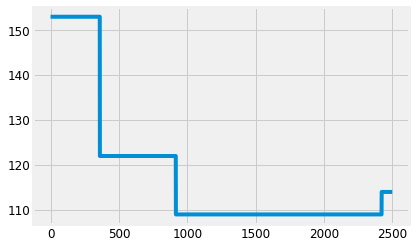

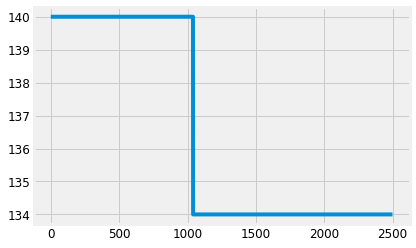

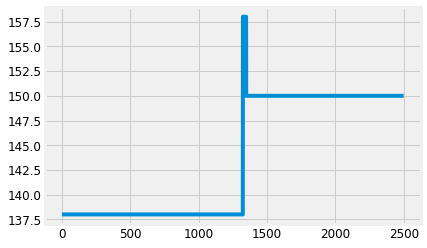

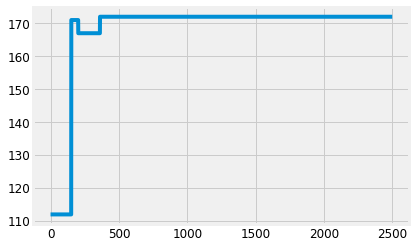

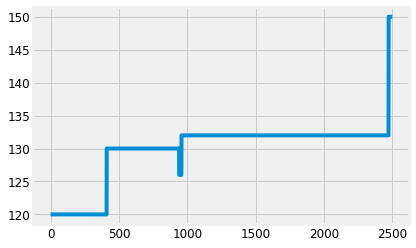

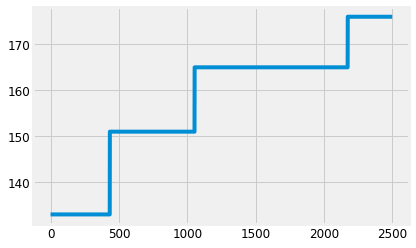

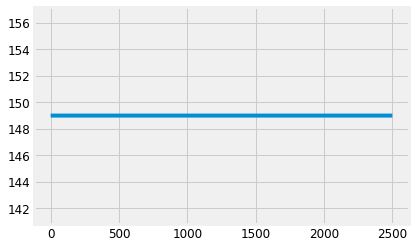

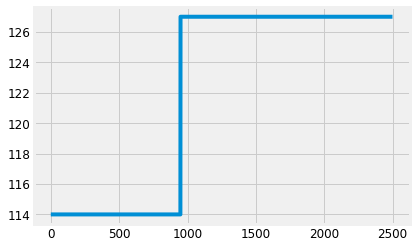

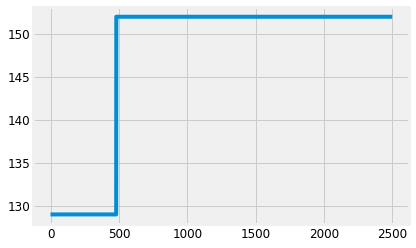

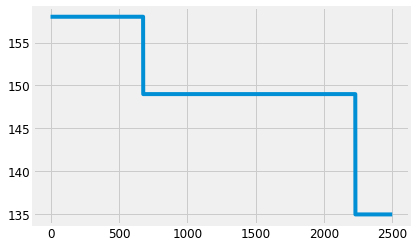

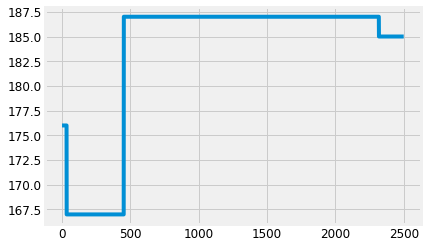

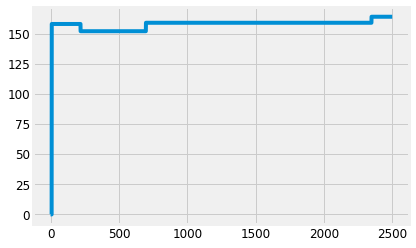

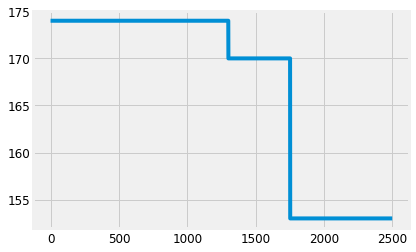

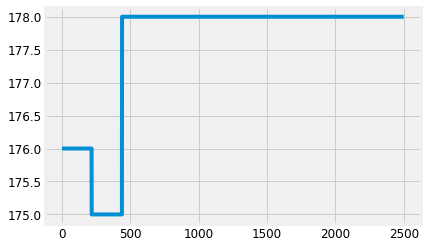

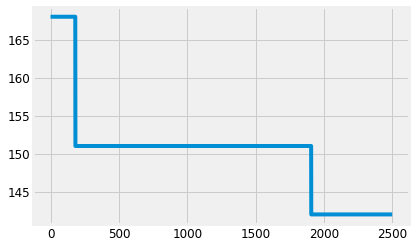

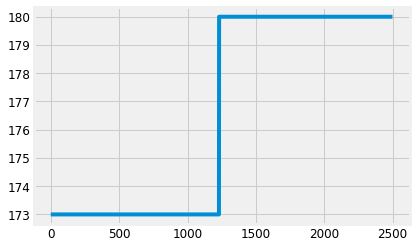

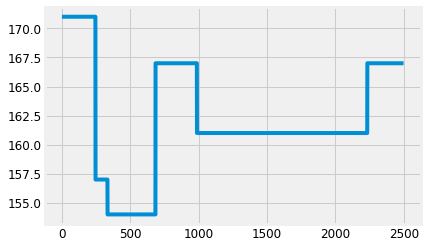

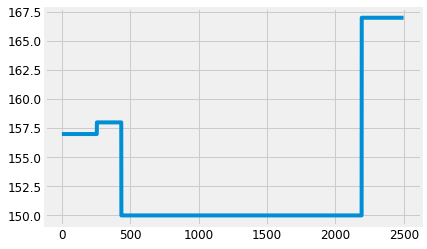

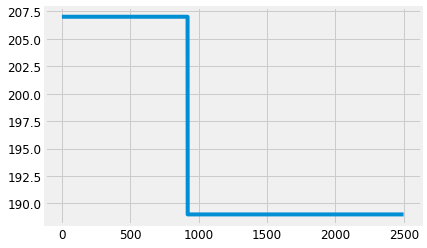

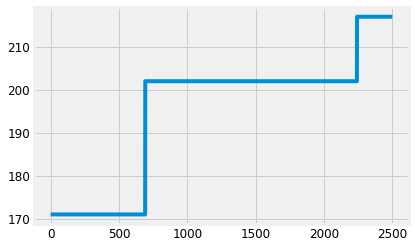

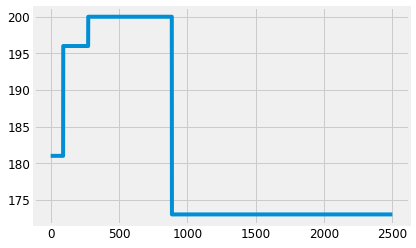

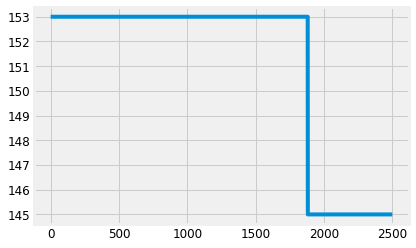

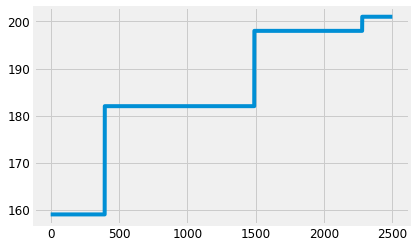

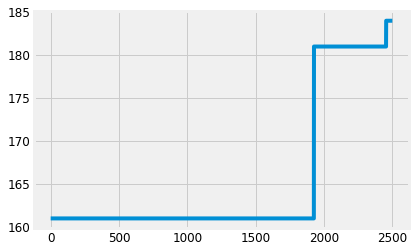

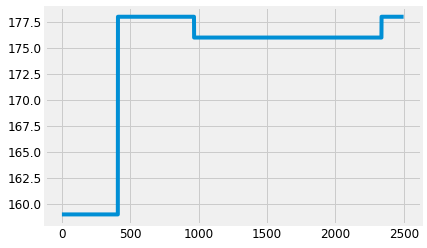

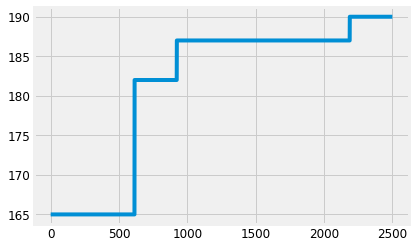

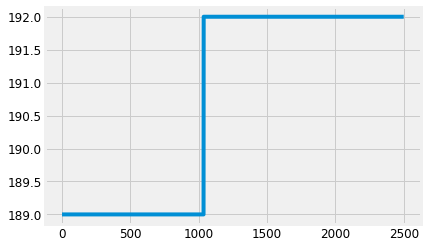

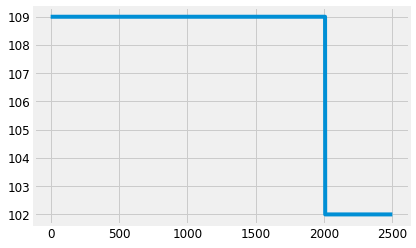

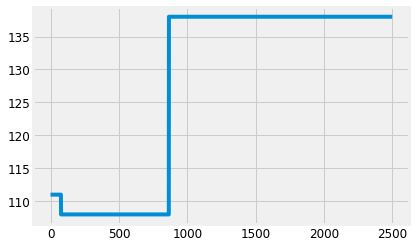

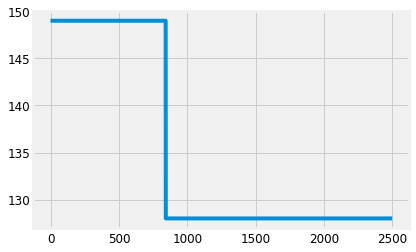

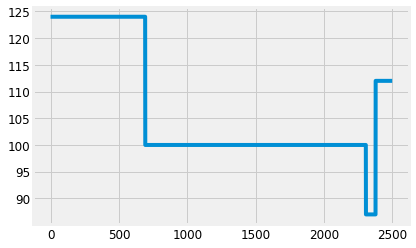

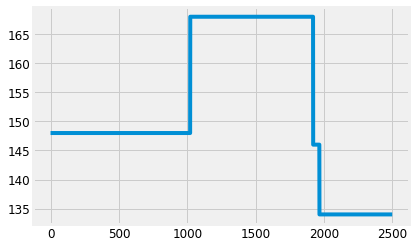

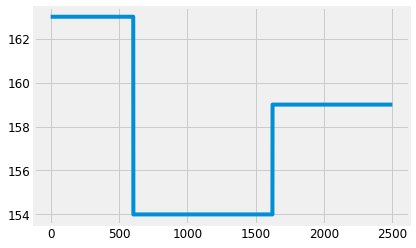

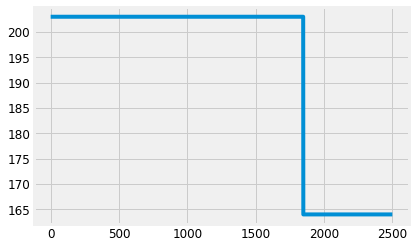

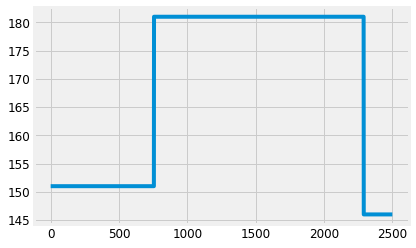

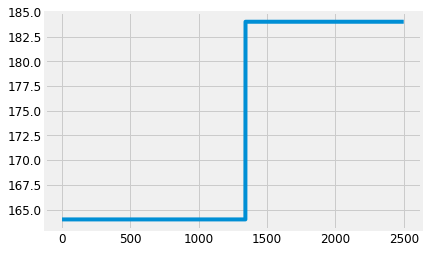

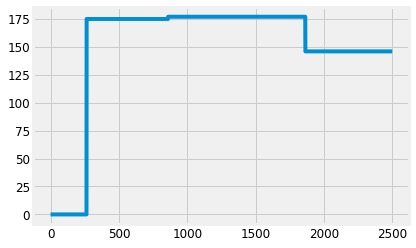

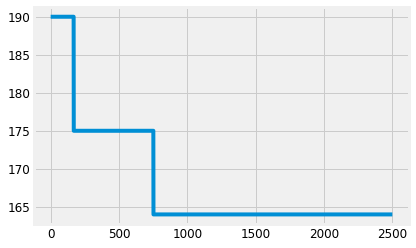

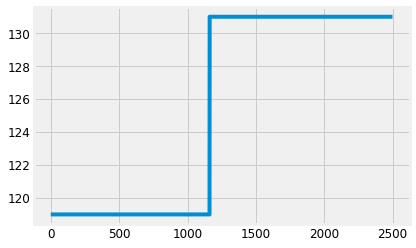

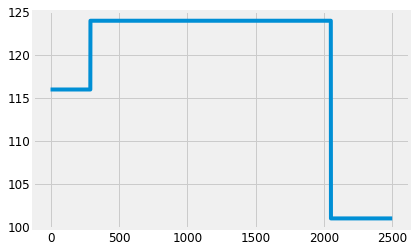

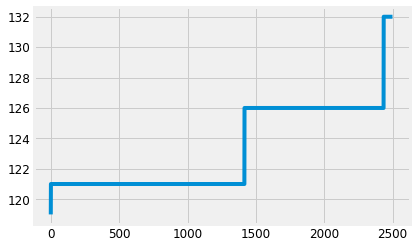

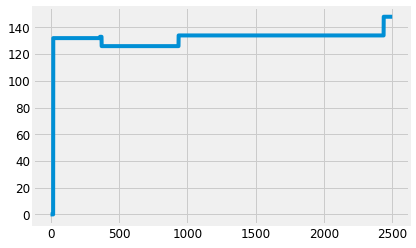

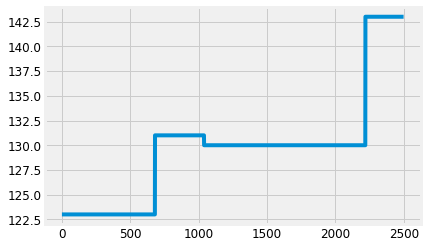

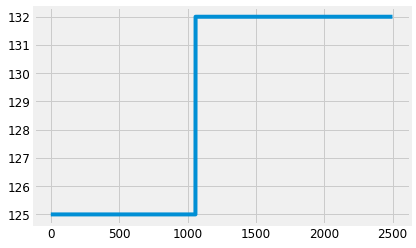

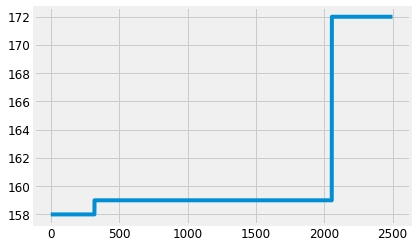

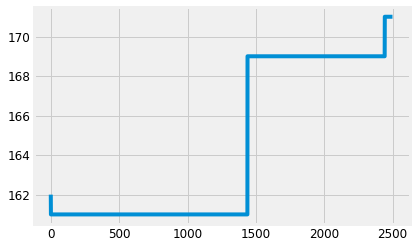

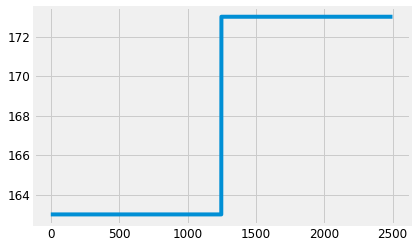

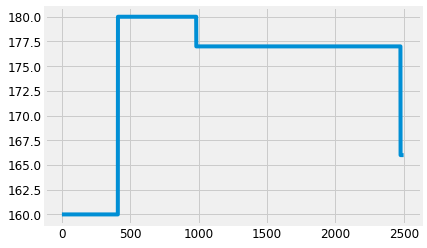

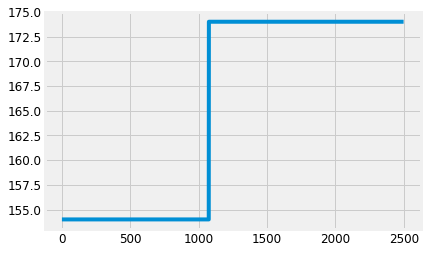

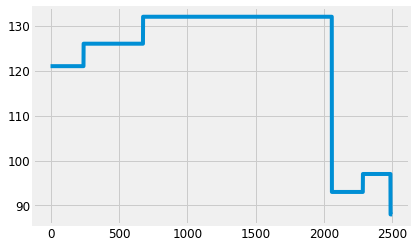

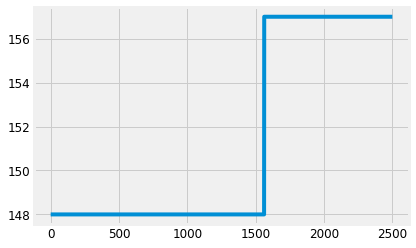

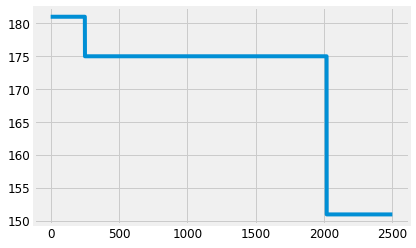

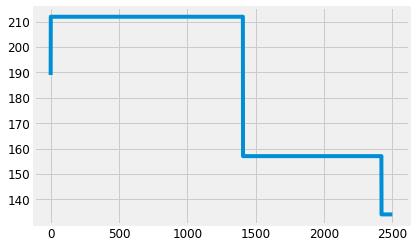

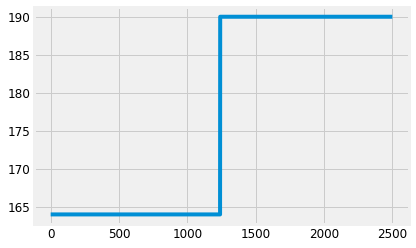

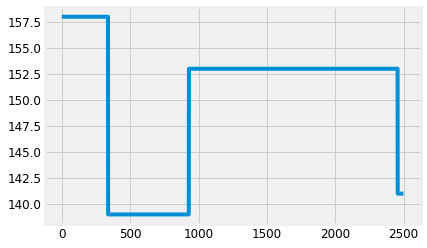

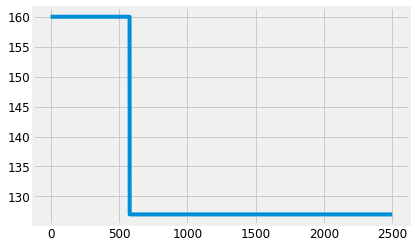

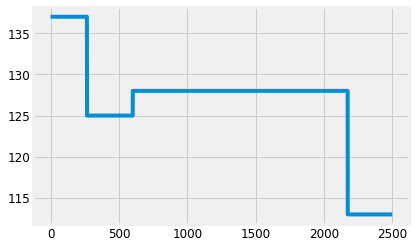

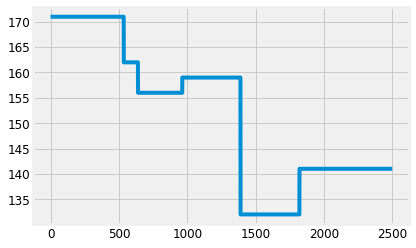

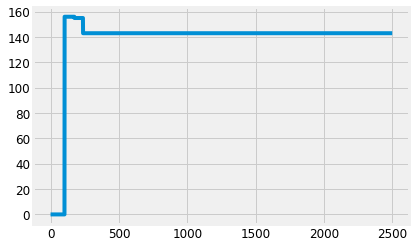

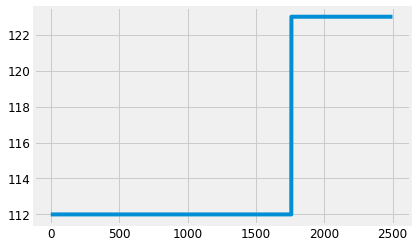

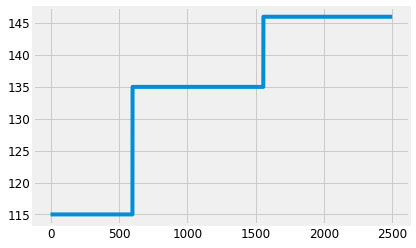

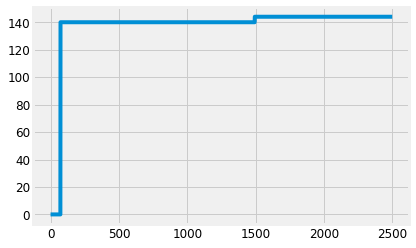

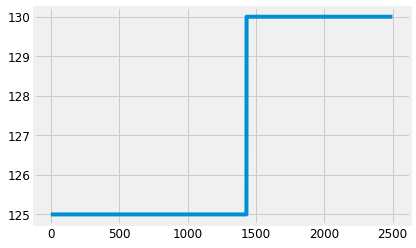

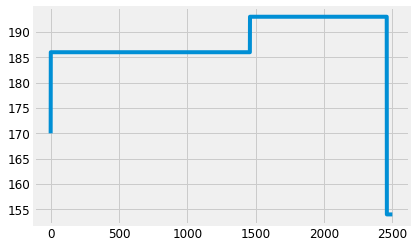

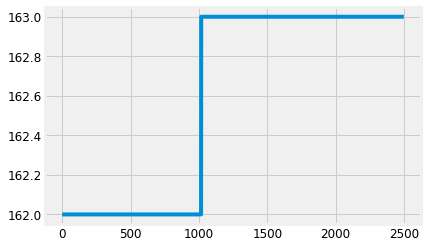

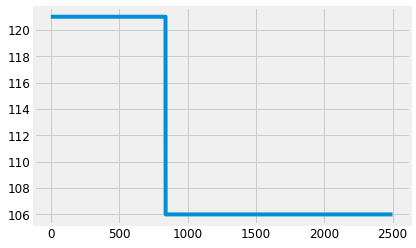

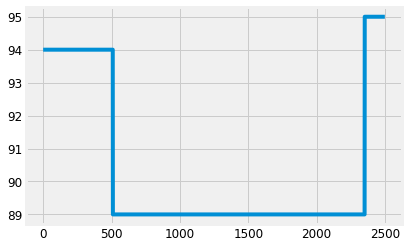

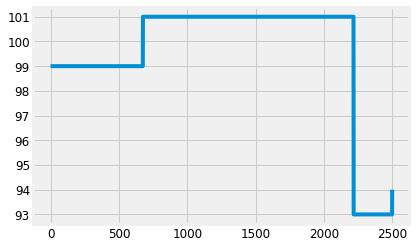

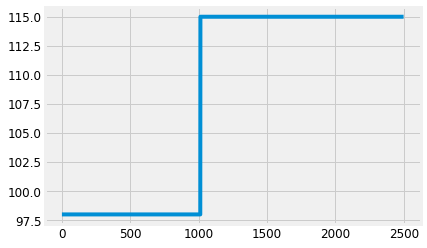

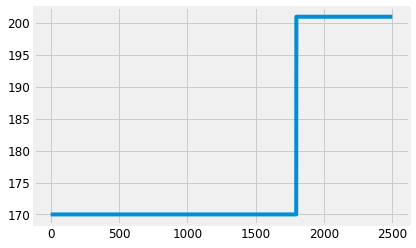

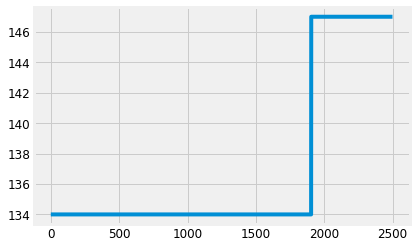

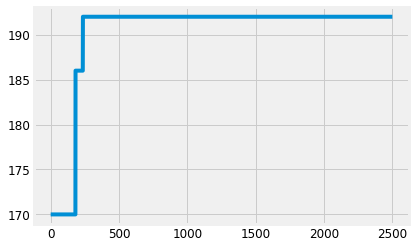

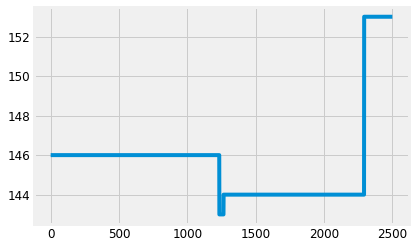

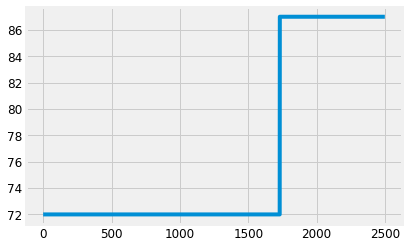

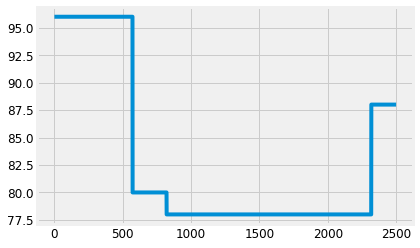

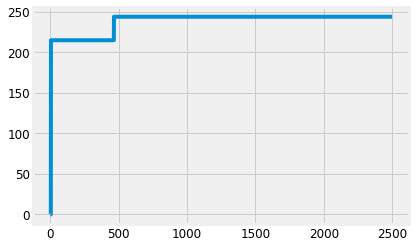

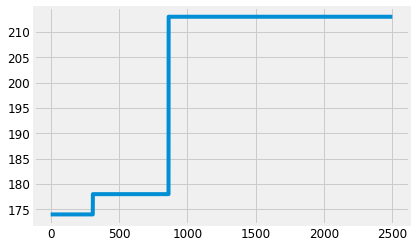

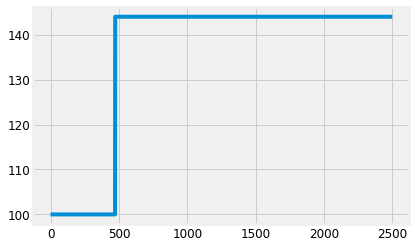

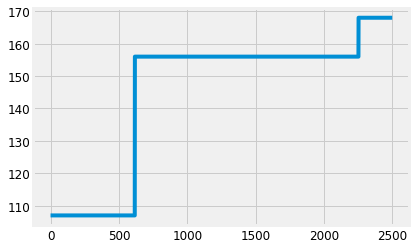

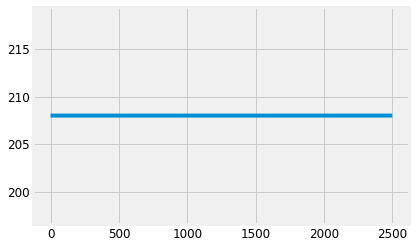

In [26]:
for i in range(82):
    plt.plot(NewData[i])
    plt.show()
    plt.close()

In [27]:
# R=np.zeros((82,250))
# for z in range(82):
#     count=0
#     for i in range(0,2500,10):
#         var=np.array(NewData[z,i:i+10])
#         increase=0
#         decrease=0
#         constant=0
#         for j in range(9):
#             if(var[j]==var[j+1]):
#                 constant=constant+1
#             elif(var[j]<var[j+1]):
#                 increase+=1
#             elif(var[j]>var[j+1]):
#                 decrease+=1
#         value=1000*constant+100*increase+10*decrease
#         R[z,count]=value
#         count+=1
    

In [28]:
#NewData

In [29]:
R=np.zeros((82,2))
for z in range(82):
    var=np.array(NewData[z,:])
    increase=0
    decrease=0
    for j in range(2499):
        var=np.array(NewData[z,:])
        if(var[j]<var[j+1]):
            increase+=1
        elif(var[j]>var[j+1]):
            decrease+=1
    R[z]=[increase,decrease]

In [30]:
#NewData
#R

In [31]:
KData=[]
for i in range(82):
    KData.append(R[i])

In [32]:
KData[]

array([3., 1.])

In [33]:
from sklearn.cluster import KMeans
random_state=170
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=random_state)
y_kmeans=kmeans.fit_predict(KData)

In [34]:
y_kmeans

array([2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2], dtype=int32)

In [35]:
Y=y_kmeans.tolist()

In [49]:
yKmeans=pd.DataFrame(Y)
yKmeans

,0
0,2
1,1
2,1
3,2
4,2
5,0
6,0
7,0
8,2
9,2


In [37]:
Clusters=pd.concat([G,yKmeans], axis=1)

In [41]:
Clusters.columns = ["PatientNumber", "Date", "No of Entries", "Clusters"]

In [47]:
#Clusters

In [45]:
Clusters.to_csv("./Clusters.csv",index=None,header=True)

In [39]:
def interval(grp):
    j = 0
    count=[]
    for i in range(100):
        gr = grp[j:j+10]
        j = j+10
        list=gr.iloc[0:10]["BPSyst"].values
        for k in range(9):
            if list[k]==list[k+1]:
                c=0
            elif list[k]<=list[k+1]:
                c=1
                break;
            else:
                c=-1
                break;
        count.append(c)
    print(count)
        